# Analisis Exploratorio

## Medidas de tendencial central

In [49]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
bikes_df = pd.read_csv('data/bicicletas-compartidas.csv')
bikes_df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [7]:
y = bikes_df['bicis-compartidas'].values
y = np.where(y == 0, 1, y)
np.min(y)

1

In [8]:
np.max(y)

7860

In [9]:
np.mean(y)

1143.1016997817849

In [10]:
scipy.stats.mstats.hmean(y)

241.65180305136826

In [12]:
np.median(y)

844.0

In [13]:
def mode(y):
    values, count_values = np.unique(y, return_counts = True)
    position = np.argmax(count_values)
    mode = values[position]
    
    return mode

In [14]:
mode = mode(y)
print(f'The mode is {mode}')

The mode is 46


In [15]:
np.std(y)

1085.0768508213835

In [21]:
y_modified = y.copy()
y_modified[y_modified == max(y_modified)] = 100000

In [22]:
print(f'The regular mean is {np.mean(y)}, and the modified mean is {np.mean(y_modified)}')

The regular mean is 1143.1016997817849, and the modified mean is 1148.392844837487


In [23]:
print(f'The median is {np.median(y)}, and the modified median is {np.median(y_modified)}')

The median is 844.0, and the modified median is 844.0


## Diagramas de frecuencias para variables continuas y discretas

In [25]:
bikes_df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [29]:
y_cat = bikes_df['cuartil-ano']
y_cat = y_cat.apply(lambda x: 'Cat-' + str(int(x)))
y_cat.head(10)

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
5    Cat-3
6    Cat-3
7    Cat-3
8    Cat-3
9    Cat-3
Name: cuartil-ano, dtype: object

In [30]:
y_values, y_counts = np.unique(y_cat, return_counts=True)
y_values, y_counts

(array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object),
 array([4394, 4387, 4303, 4330]))

In [31]:
table_frequencies = dict(zip(y_values, y_counts))
table_frequencies

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [32]:
y_num = bikes_df['viento'].copy()
np.min(y_num), np.max(y_num)

(0.0, 56.5)

In [33]:
np.percentile(y_num, q=100)

56.5

In [34]:
np.percentile(y_num, q=0)

0.0

In [35]:
np.percentile(y_num, q=50)

15.0

In [36]:
np.median(y_num)

15.0

In [37]:
values_percentiles = [0, 25, 50, 75, 100]
np.percentile(y_num, q = values_percentiles)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [41]:
values_percentiles = [0, 20, 40, 60, 80, 100]
np.percentile(y_num, q = values_percentiles)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [42]:
values_percentiles = list(range(0, 110, 10))
np.percentile(y_num, q = values_percentiles)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [44]:
bikes_df['bicis-compartidas'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [45]:
Q1 = np.percentile(y_num, q = 25)
Q3 = np.percentile(y_num, q = 75)

RI = Q3 - Q1

lim_inf = Q1 - 1.5*RI
lim_sup = Q3 + 1.5*RI

[lim_inf, lim_sup]

[-5.75, 36.25]

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <BarContainer object of 10 artists>)

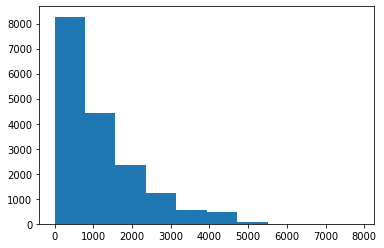

In [48]:
plt.hist(bikes_df['bicis-compartidas'])

In [50]:
bikes_df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [52]:
y_quartiles = bikes_df['cuartil-ano'].apply(lambda x: 'quartile-' + str(int(x)))
y_quartiles

0        quartile-3
1        quartile-3
2        quartile-3
3        quartile-3
4        quartile-3
            ...    
17409    quartile-3
17410    quartile-3
17411    quartile-3
17412    quartile-3
17413    quartile-3
Name: cuartil-ano, Length: 17414, dtype: object

Text(0, 0.5, 'Frequency')

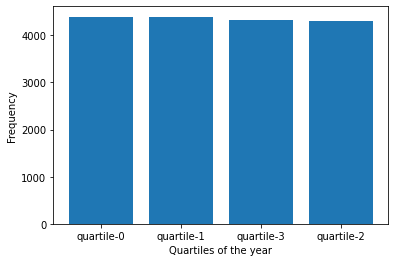

In [54]:
fig, ax = plt.subplots()

ax.bar(y_quartiles.value_counts().index, y_quartiles.value_counts())
ax.set_xlabel('Quartiles of the year')
ax.set_ylabel('Frequency')

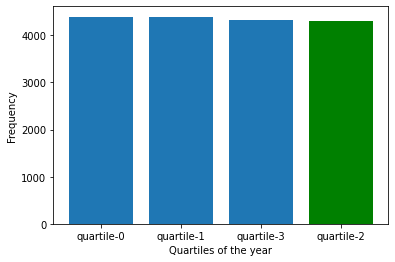

In [60]:
fig, ax = plt.subplots()

ax.bar(y_quartiles.value_counts().index, y_quartiles.value_counts())
ax.set_xlabel('Quartiles of the year')
ax.set_ylabel('Frequency')
ax.patches[3].set_facecolor('green')

Text(0.5, 1.0, 'Pie Diagram')

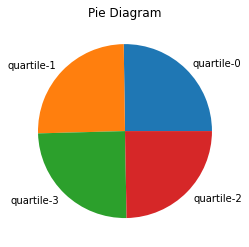

In [64]:
figure, axis = plt.subplots()

axis.pie(y_quartiles.value_counts(), labels=y_quartiles.value_counts().index)
axis.set_title('Pie Diagram')

In [65]:
y_numerical = bikes_df['viento']

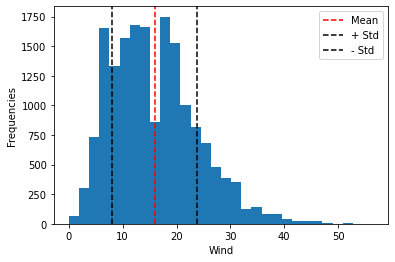

In [69]:
figure, axis = plt.subplots()

axis.hist(y_numerical, bins=30)
axis.set_xlabel('Wind')
axis.set_ylabel('Frequencies')
plt.axvline(np.mean(y_numerical), c='r', linestyle="--", label="Mean")
plt.axvline(np.mean(y_numerical) + np.std(y_numerical), c='k', linestyle="--", label="+ Std")
plt.axvline(np.mean(y_numerical) - np.std(y_numerical), c='k', linestyle="--", label="- Std")
axis.legend()

<AxesSubplot:xlabel='cuartil-ano', ylabel='bicis-compartidas'>

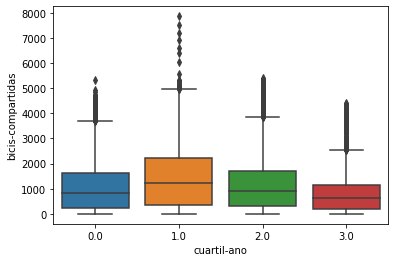

In [72]:
y_shared = bikes_df['bicis-compartidas']

fig, axis = plt.subplots()

sns.boxplot(x='cuartil-ano', y='bicis-compartidas', data=bikes_df)

Text(0, 0.5, 'Bicicletas Compartidas')

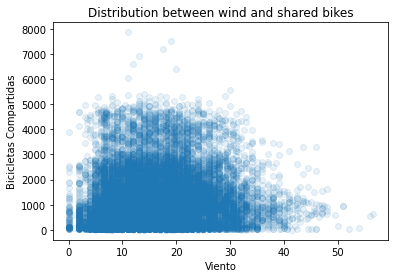

In [77]:
figure, axis = plt.subplots()
axis.scatter(bikes_df['viento'], bikes_df['bicis-compartidas'], alpha=0.1)
axis.set_title('Distribution between wind and shared bikes')
axis.set_xlabel('Viento')
axis.set_ylabel('Bicicletas Compartidas')